Epoch 1/200
24/24 [==============================] - 1s 10ms/step - loss: 0.6747 - accuracy: 0.6782 - val_loss: 0.6713 - val_accuracy: 0.7808
Epoch 2/200
24/24 [==============================] - 0s 4ms/step - loss: 0.6670 - accuracy: 0.7328 - val_loss: 0.6665 - val_accuracy: 0.7534
Epoch 3/200
24/24 [==============================] - 0s 4ms/step - loss: 0.6597 - accuracy: 0.7459 - val_loss: 0.6625 - val_accuracy: 0.7534
Epoch 4/200
24/24 [==============================] - 0s 4ms/step - loss: 0.6577 - accuracy: 0.7671 - val_loss: 0.6583 - val_accuracy: 0.7534
Epoch 5/200
24/24 [==============================] - 0s 4ms/step - loss: 0.6530 - accuracy: 0.7644 - val_loss: 0.6541 - val_accuracy: 0.7534
Epoch 6/200
24/24 [==============================] - 0s 4ms/step - loss: 0.6459 - accuracy: 0.7794 - val_loss: 0.6501 - val_accuracy: 0.7534
Epoch 7/200
24/24 [==============================] - 0s 4ms/step - loss: 0.6384 - accuracy: 0.7949 - val_loss: 0.6461 - val_accuracy: 0.7329
Epoch 8/200


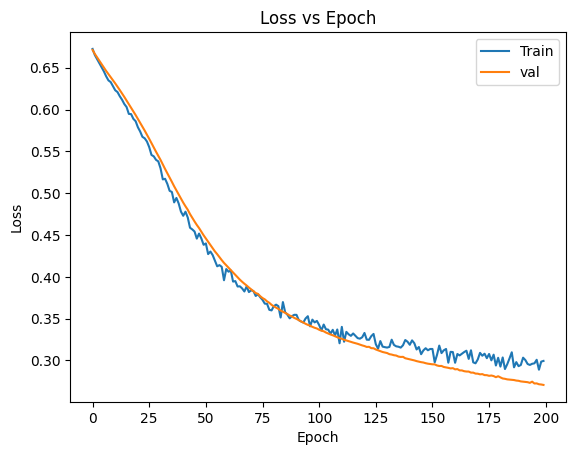

In [33]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.layers import Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd

df = pd.read_csv("housepricedata.csv")
# df.head(7)
dataset = df.values
X = dataset[:,:10]
Y = dataset[:,10]
min_max_scaler = MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.2)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test,Y_val_and_test, test_size= 0.5)
class neural_network:
    def __init__(self,X_va, X_tra,Y_va,Y_tra,lay,uni,act,bat_siz,epo,learn_rate):
        self.network = Sequential()
        self.network.add(Dense(units=uni, activation=act, input_dim = 10))
        for i in range(lay):
            self.network.add(Dense(units=uni, activation=act,kernel_initializer = 'glorot_uniform'))
            self.network.add(Dropout(0.34))
        self.network.add(Dense(units=1, activation='sigmoid'))
        SD = tf.keras.optimizers.SGD(learning_rate=learn_rate,momentum=0.03, lr = 0.009)
        es = EarlyStopping(
            monitor= 'val_loss',
            patience = 10,
            verbose = 1,
            mode = 'min'
        )
        self.network.compile(optimizer=SD, loss='binary_crossentropy', metrics=['accuracy'])
        self.histo = self.network.fit(X_tra, Y_tra,callbacks = [es],verbose = 1, batch_size=bat_siz, epochs=epo,validation_data =(X_va, Y_va))
networ = neural_network(X_val,X_train,Y_val,Y_train,1,30,'relu',50,200,0.02)
# print("sdhsbdjkan")
print(networ.network.evaluate(X_val,Y_val)[1])
prediction = networ.network.predict(X_test)
prediction = [1 if y>=0.87 else 0 for y in prediction]
# prediction
plt.plot(networ.histo.history['loss'])
plt.plot(networ.histo.history['val_loss'])
plt.title("Loss vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Train","val"], loc = "upper right")
plt.show()